In [1]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [2]:
# Read in the data with read_csv() into a Pandas Dataframe
housing_df = pd.read_csv('C:/Users/Nana Kojo Hagan/Desktop/Machine Learning Lessons/artificial-intelligence-foundations-machine-learning-3067770-main/housing.csv')

#use .info() to show the variables along with their count and datatype
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Text(0.5, 0, 'Housing Values')

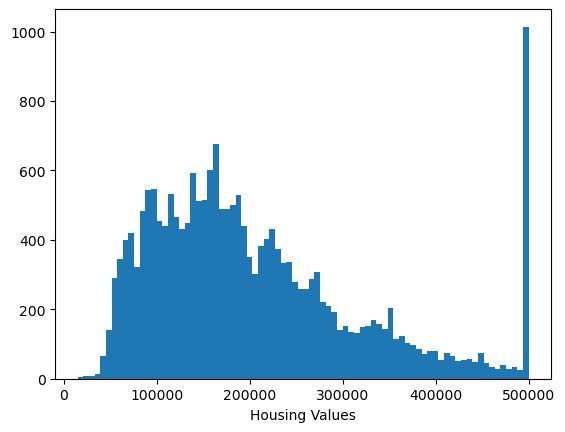

In [4]:
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("Housing Values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

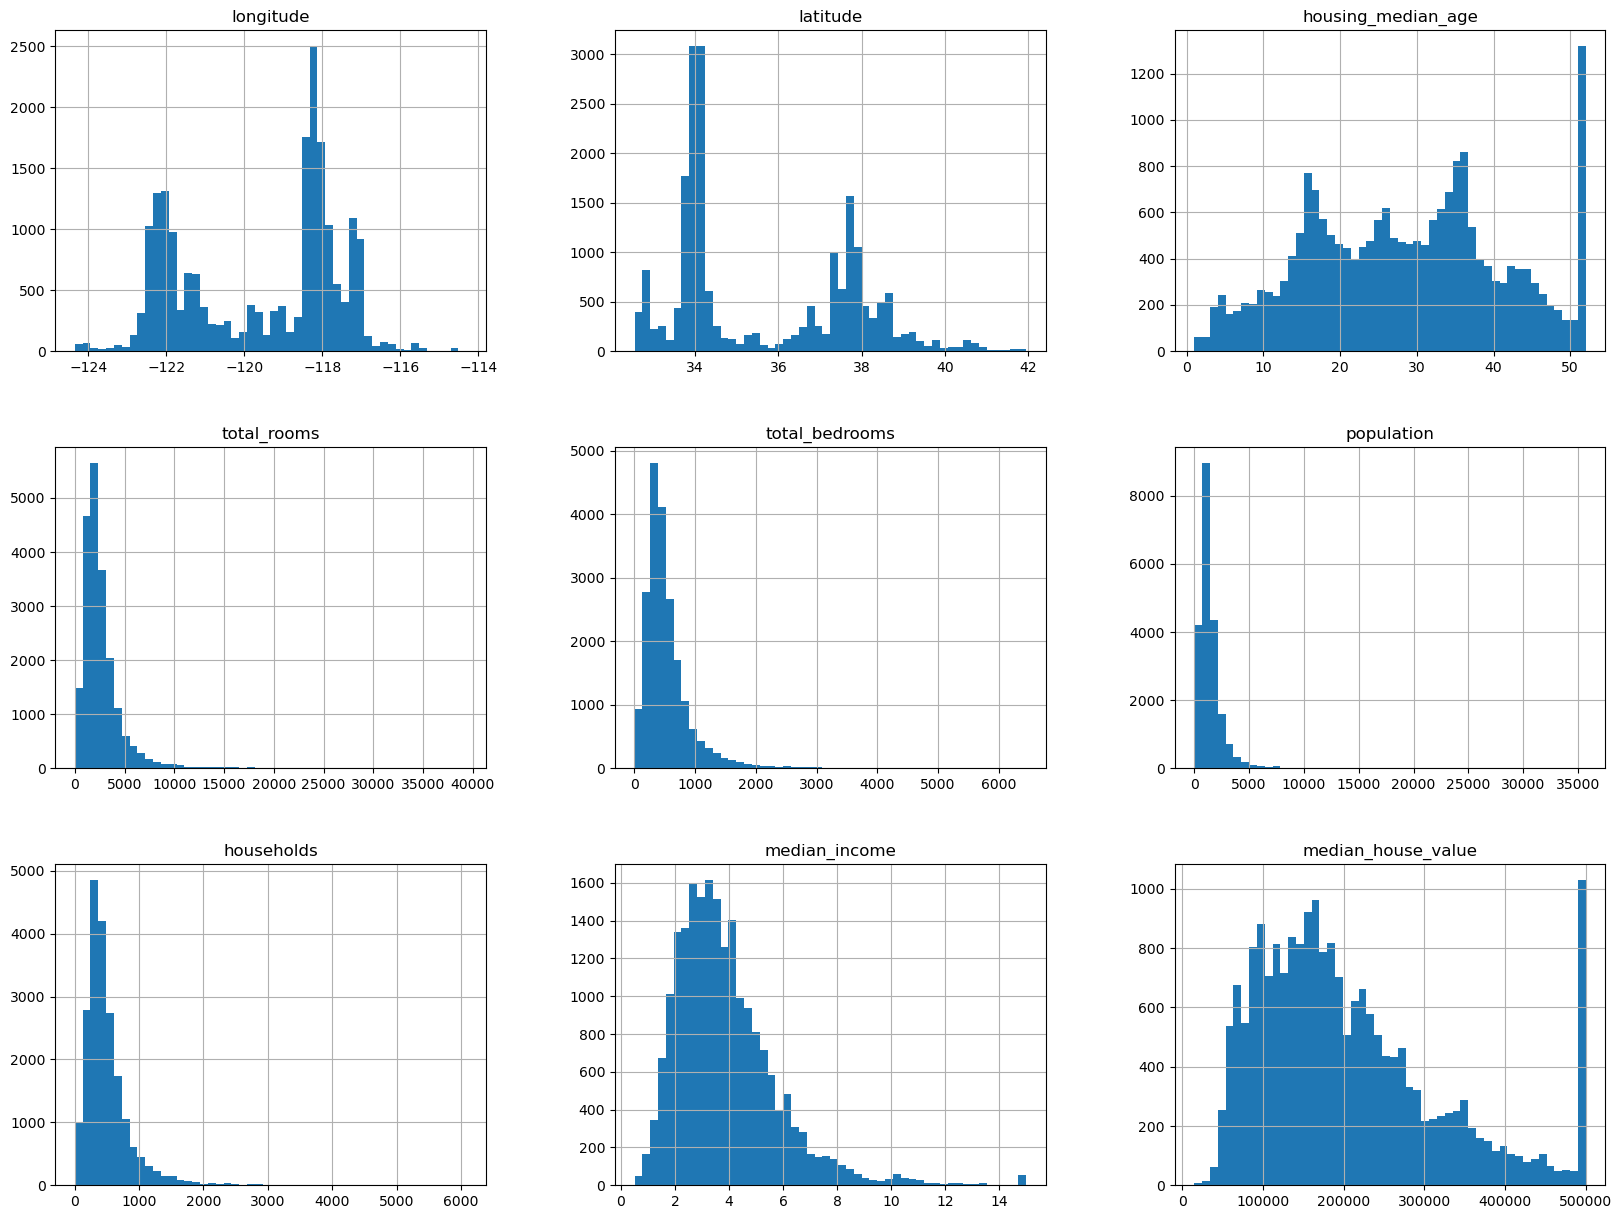

In [5]:
#histograms for all numeric variables
housing_df.hist(bins=50, figsize=(20,15))

In [6]:
# Calculate the correlation matrix
housing_numeric = housing_df.select_dtypes(include=['number'])
corr = housing_numeric.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

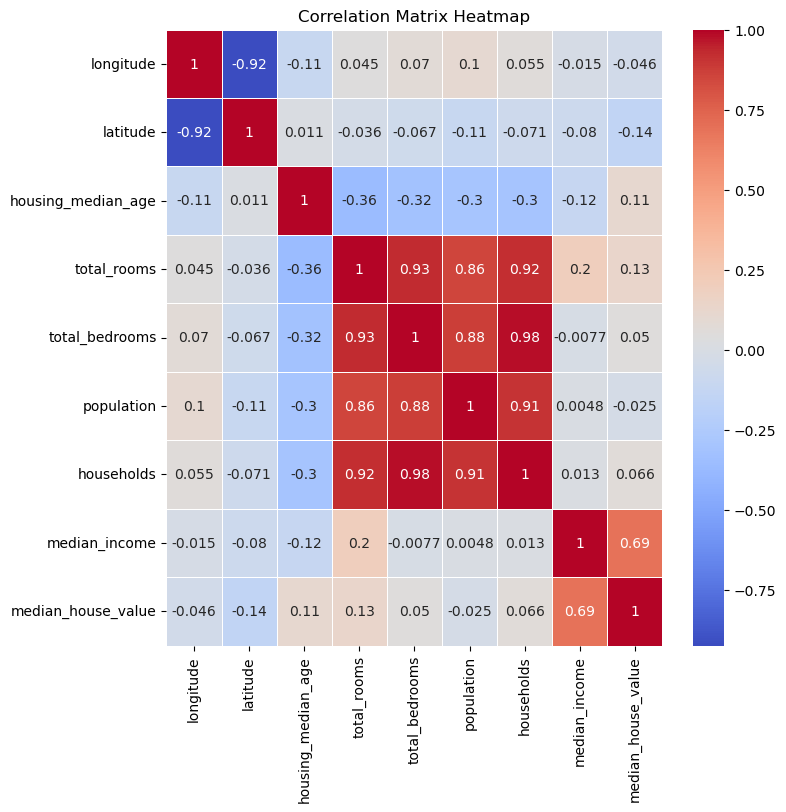

In [7]:
# Create a heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
#verify which features have missing values
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [9]:
#calculate the percentage of missing data
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

1.002906976744186

In [10]:
from sklearn.impute import KNNImputer

#create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

#retrieve columns with numerical data
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

#extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

#update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [11]:
#initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

#fit function trains the model
knn.fit(housing_df_temp)

#transform the data using model
#applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

#convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)

In [12]:
#confirm there are no columns with missing values
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [13]:
#overlay the imputed column over the old column with missing values

#loop through th elist of columns and overlay each one
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp.replace(housing_df[column_name],housing_df[column_name])
    
#confirm columns no longer contain null data
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

Text(0.5, 0, 'House Values')

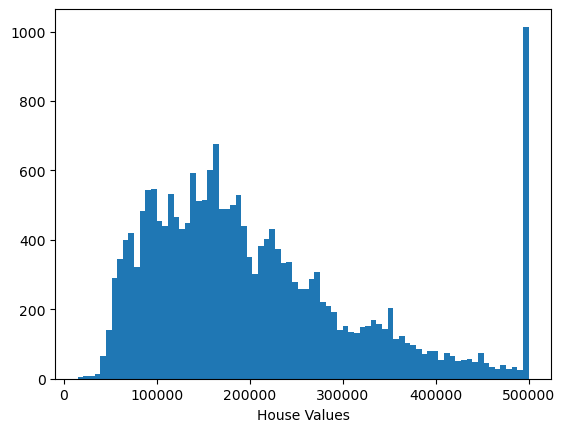

In [14]:
#Plot the distribution of the taret variable
plt.hist(housing_df['median_house_value'], bins=80)
plt.xlabel("House Values")

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

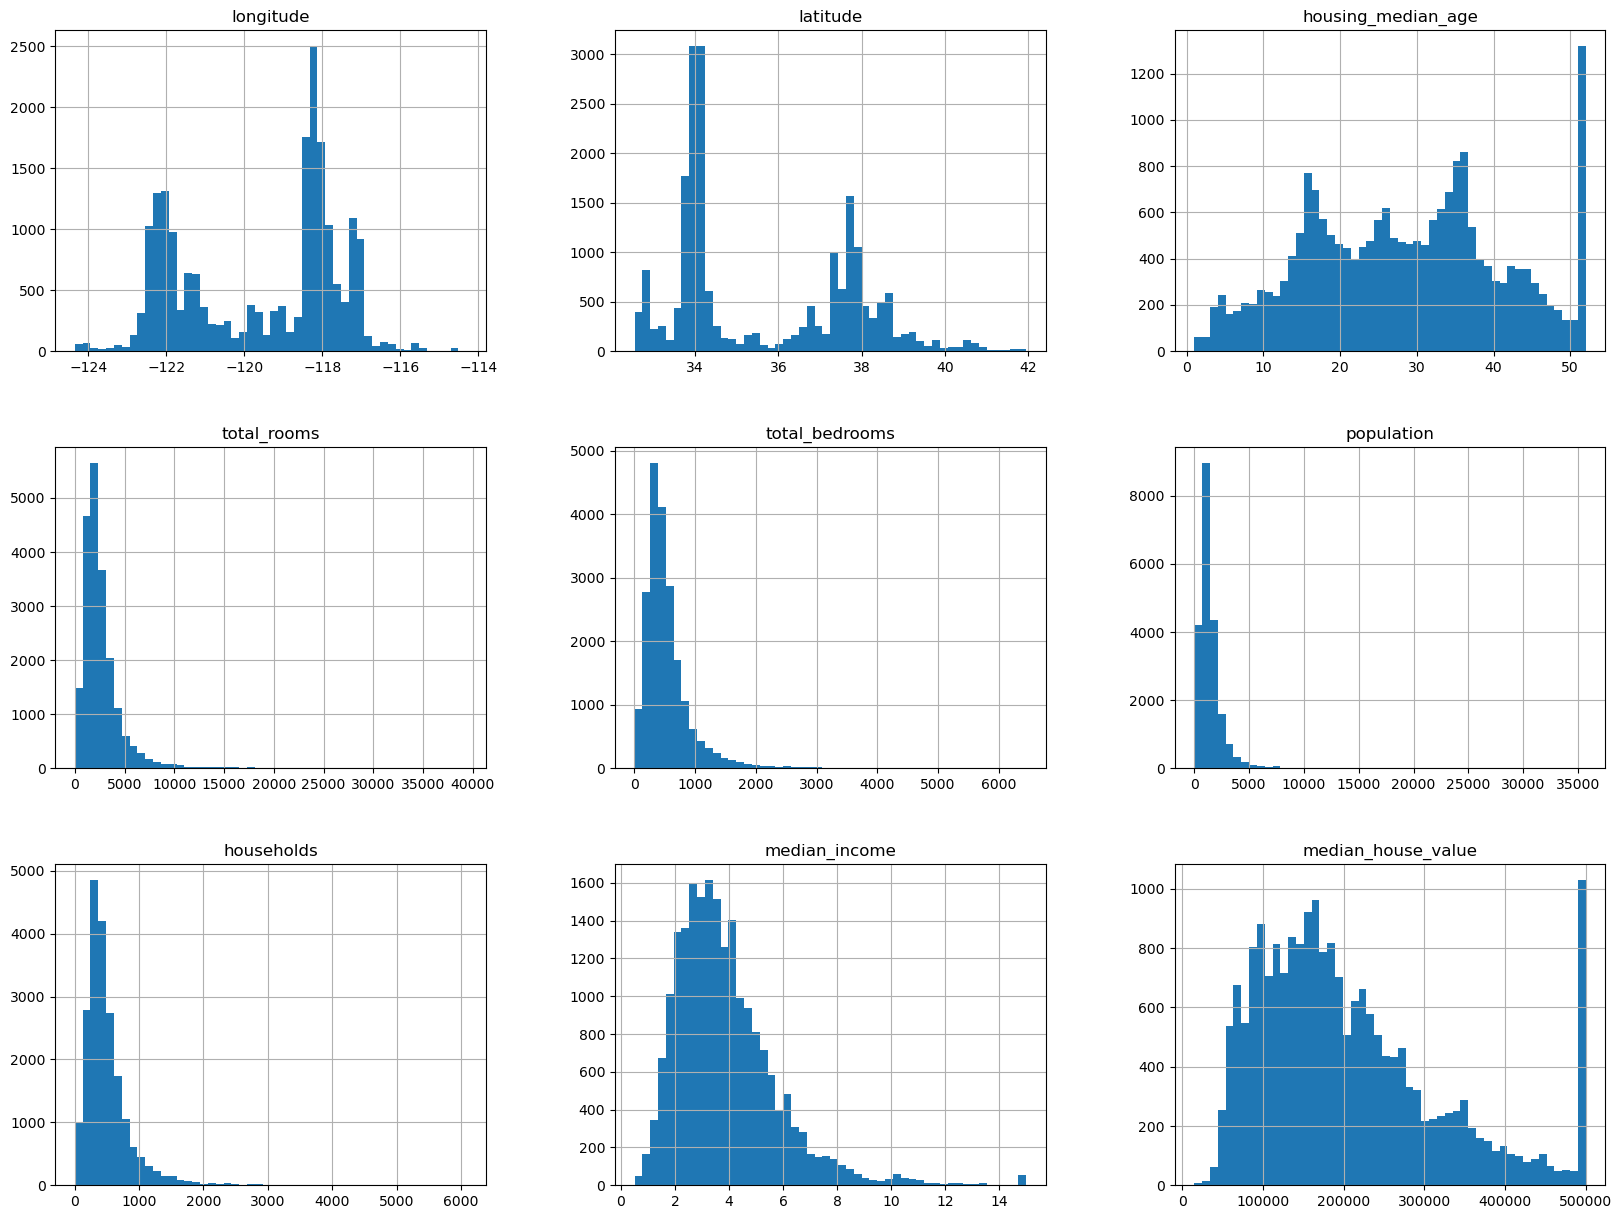

In [15]:
#now lets do histograms for all the features to understand theie various distributions after the KNN imputations
housing_df.hist(bins=50, figsize=(20,15))

In [16]:
# Calculate the correlation matrix
housing_numeric = housing_df.select_dtypes(include=['number'])
corr = housing_numeric.corr()
print(corr)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069260 -0.066658           -0.318998     0.927253   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069260    0.099773    0.055310      -0.015176   
latitude                 -0.066658   -0.108785   -0.071035      -0.079809   
housing_

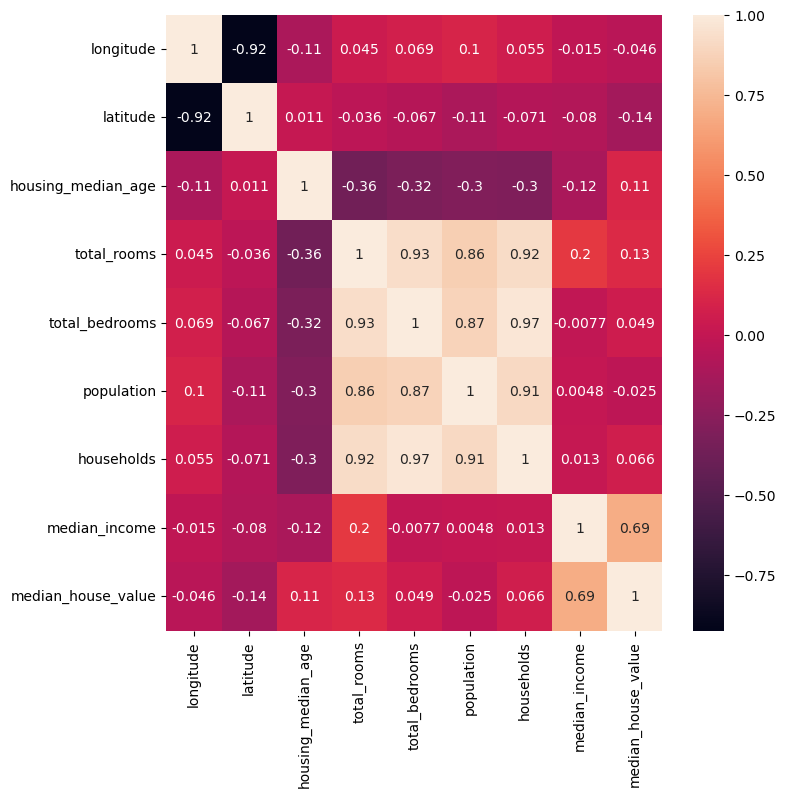

In [17]:
plt.figure(figsize = (8,8))

sns.heatmap(corr, annot=True)
plt.show()

In [18]:
#We can see that (total rooms, total_bedrooms, population, households) are highly correlated. So we will attempt to combine some.

#first is Rooms per Household
housing_df['Rooms_per_Household'] = housing_df['total_rooms']/housing_df['households']

#the total bedrooms to the total rooms
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_df['population_per_household']= housing_df['population']/housing_df['households']

# let's combine the latitude and longitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  Rooms_per_Household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [19]:
#Now lets remove the old features
#housing_df = housing_df.drop('total_rooms', axis=1)
#housing_df = housing_df.drop('total_bedrooms', axis=1)
housing_df = housing_df.drop('population', axis=1)
housing_df = housing_df.drop('households', axis=1)
housing_df = housing_df.drop('longitude', axis=1)
housing_df = housing_df.drop('latitude', axis=1)

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        20640 non-null  float64
 1   total_rooms               20640 non-null  float64
 2   total_bedrooms            20640 non-null  float64
 3   median_income             20640 non-null  float64
 4   median_house_value        20640 non-null  float64
 5   ocean_proximity           20640 non-null  object 
 6   Rooms_per_Household       20640 non-null  float64
 7   bedrooms_per_room         20640 non-null  float64
 8   population_per_household  20640 non-null  float64
 9   coords                    20640 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
housing_df.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,ocean_proximity,Rooms_per_Household,bedrooms_per_room,population_per_household,coords
0,41.0,880.0,129.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,-3.226769
1,21.0,7099.0,1106.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,-3.228209
2,52.0,1467.0,190.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,-3.229590
3,52.0,1274.0,235.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,-3.229855
4,52.0,1627.0,280.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,-3.229855


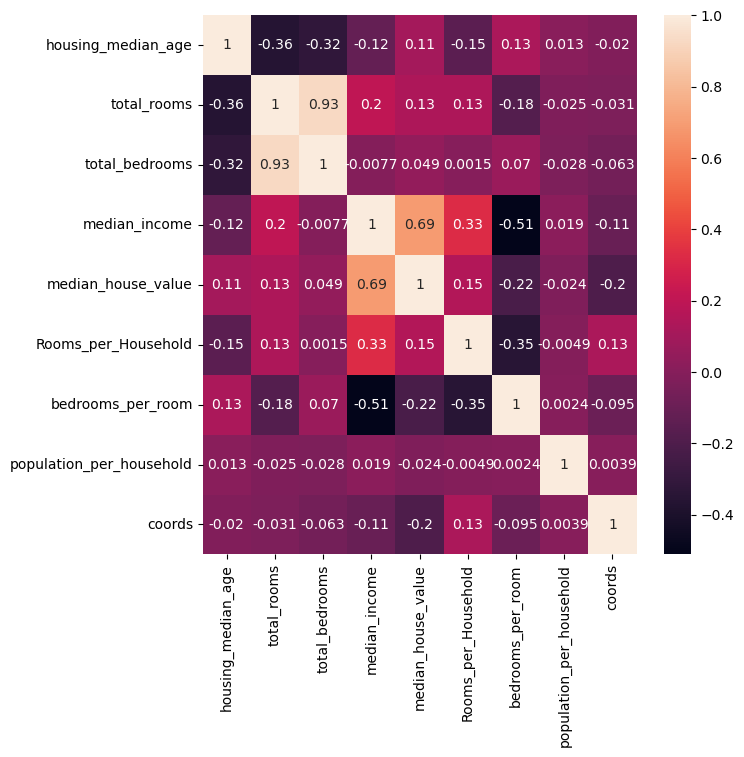

In [21]:
corr = housing_df.corr(numeric_only=True)
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

In [22]:
#Now we want to use One hot coding to convert 'Ocean_Proximity' from categorical to numeric
#First lets see the various categories and count.

housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [23]:
# Let's see how the Panda's get_dummies() function works
housing_df_encoded = pd.get_dummies(housing_df['ocean_proximity']).astype(int)

print(housing_df_encoded)

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0              0       0       0         1           0
1              0       0       0         1           0
2              0       0       0         1           0
3              0       0       0         1           0
4              0       0       0         1           0
...          ...     ...     ...       ...         ...
20635          0       1       0         0           0
20636          0       1       0         0           0
20637          0       1       0         0           0
20638          0       1       0         0           0
20639          0       1       0         0           0

[20640 rows x 5 columns]


In [24]:
# let's replace the OCEAN_PROXIMITY column using get_dummies()
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity']).astype(int)

housing_df_encoded.head()

,housing_median_age,total_rooms,total_bedrooms,median_income,median_house_value,Rooms_per_Household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41,880,129,8,452600,6,0,2,-3,0,0,0,1,0
1,21,7099,1106,8,358500,6,0,2,-3,0,0,0,1,0
2,52,1467,190,7,352100,8,0,2,-3,0,0,0,1,0
3,52,1274,235,5,341300,5,0,2,-3,0,0,0,1,0
4,52,1627,280,3,342200,6,0,2,-3,0,0,0,1,0


In [25]:
housing_df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   housing_median_age          20640 non-null  int32
 1   total_rooms                 20640 non-null  int32
 2   total_bedrooms              20640 non-null  int32
 3   median_income               20640 non-null  int32
 4   median_house_value          20640 non-null  int32
 5   Rooms_per_Household         20640 non-null  int32
 6   bedrooms_per_room           20640 non-null  int32
 7   population_per_household    20640 non-null  int32
 8   coords                      20640 non-null  int32
 9   ocean_proximity_<1H OCEAN   20640 non-null  int32
 10  ocean_proximity_INLAND      20640 non-null  int32
 11  ocean_proximity_ISLAND      20640 non-null  int32
 12  ocean_proximity_NEAR BAY    20640 non-null  int32
 13  ocean_proximity_NEAR OCEAN  20640 non-null  int32
dtypes: int

In [26]:
import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

#The data will now have to be split into Training and Test data sets (70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

#confirm how the data was split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14448, 10)
(6192, 10)
(14448,)
(6192,)


# Linear Regression - Training Model

In [27]:
from sklearn.linear_model import LinearRegression

#Create a linear regressor using all the feature variables
reg_model = LinearRegression()

#Train the model using the training set
reg_model.fit(X_train, y_train)

LinearRegression()

# Run Predictions

In [28]:
#run the predictions on the training and testing data
y_pred_test = reg_model.predict(X_test)

In [29]:
#now compare the actualvalues with the predicted
pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

pred_test_df

,Actual,Predicted
20046,47700,61894.249854
3024,45800,103622.318309
15663,500001,246618.478192
20484,218600,275650.286864
9814,278000,233342.719648
...,...,...
17505,237500,192121.905837
13512,67300,76274.726041
10842,218400,201191.219106
16559,119400,122275.525191


# Evaluate the Model Using R^2 metric

In [30]:
r2_reg_model_test = round(reg_model.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_reg_model_test))

R^2 Test: 0.58


# RandomForestRegressor - Model Training

In [31]:
from sklearn.ensemble import RandomForestRegressor

#Now create a regressor using all the feature variables
rf_model = RandomForestRegressor(n_estimators=10, random_state=10)

#Now train the modelusing the Training Sets
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=10)

# RandomForestRegressor - Predictions

In [32]:
y_rf_pred_test = rf_model.predict(X_test)

In [33]:
#Now lets compare the actualvalues with the predicted
rf_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_rf_pred_test})

rf_pred_test_df

,Actual,Predicted
20046,47700,57418.035714
3024,45800,119484.910113
15663,500001,389118.505463
20484,218600,243134.211756
9814,278000,185748.207071
...,...,...
17505,237500,130446.357143
13512,67300,54755.841270
10842,218400,185619.893551
16559,119400,120984.861111


In [34]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_rf_pred_test)

print("R^2 - {}%".format(round(score, 2)*100))

R^2 - 62.0%


# Determine Feature Importance

<Axes: >

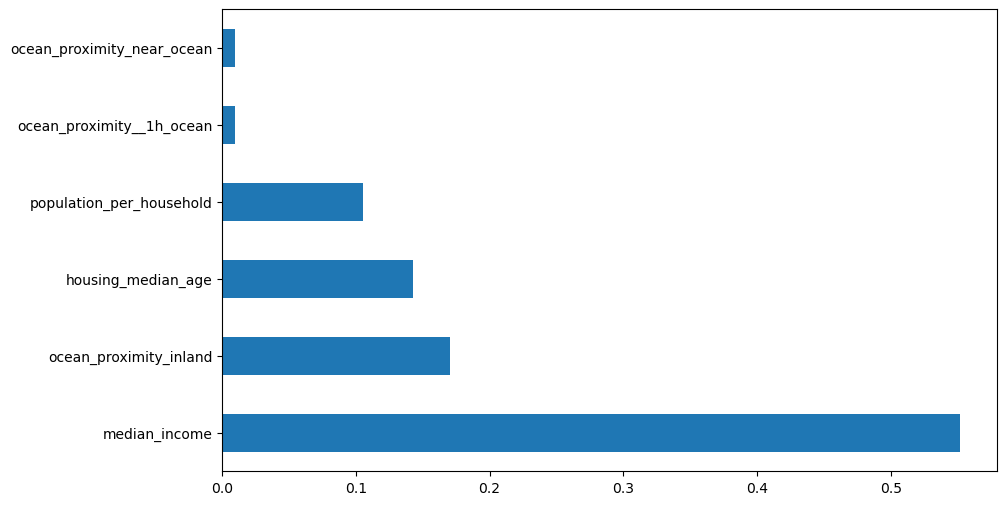

In [35]:
plt.figure(figsize=(10,6))
feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')

# XGBoost - Model Training

In [36]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [37]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()

In [38]:
#Train the Model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Run the Predictions

In [39]:
y_xgb_pred_test = xgb_model.predict(X_test)

In [40]:
#Now lets evaluate the modell
xgb_pred_test_df = pd.DataFrame({'Actual':y_test,'Predicted':y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
20046,47700,67842.593750
3024,45800,106412.960938
15663,500001,386685.125000
20484,218600,244289.640625
9814,278000,217042.562500
...,...,...
17505,237500,168306.875000
13512,67300,62856.234375
10842,218400,199096.125000
16559,119400,103965.195312


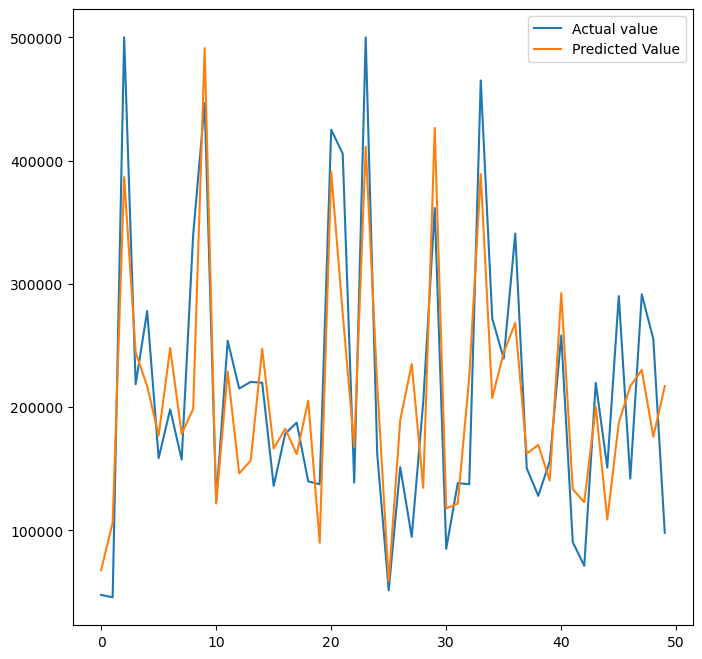

In [41]:
#Lets plot the model
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted Value'])

In [42]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_xgb_pred_test)

print("R^2 - {}%".format(round(score, 2)*100))

R^2 - 67.0%


<Axes: >

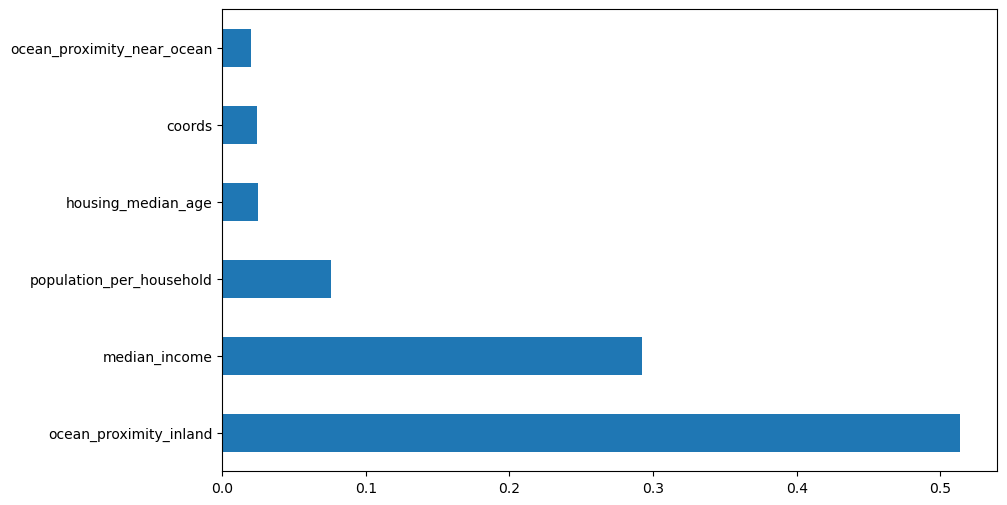

In [44]:
#Determine Feature Importance
plt.figure(figsize=(10,6))
feat_importances = pd.Series(xgb_model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(6).plot(kind='barh')

In [45]:
#Now I will train the model with the 5 most important features
train_x_if = X_train[['ocean_proximity_inland','median_income','population_per_household','housing_median_age','coords']]
test_x_if = X_test[['ocean_proximity_inland','median_income','population_per_household','housing_median_age','coords']]
xgb_model_if = XGBRegressor(n_estimators=10, random_state=10)
xgb_model_if.fit(train_x_if, y_train)
predict_test_with_if = xgb_model_if.predict(test_x_if)

In [46]:
score = r2_score(y_test, predict_test_with_if)

print("R^2 - {}%".format(round(score, 2)*100))

R^2 - 68.0%
